<a href="https://colab.research.google.com/github/OllyMuh/Python_for_DataScience/blob/lesson_4/Lesson_4_Python_for_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема “Обучение без учителя”

**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [81]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler

# Кластеризация
from sklearn.cluster import KMeans

# понижение размерности
from sklearn.manifold import TSNE

In [82]:
# задаем переменные
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

# создаем датафреймы X и y
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [83]:
# разбиваем датафреймы на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

In [84]:
# масштабируем с помощью StandardScaler
scaler = StandardScaler()

colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=colnames)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [85]:
# функция для понижения размерности
def reduse_dims(df, dims = 2, method = 'tsne', perplexity=30):  # измененение perplexity результата особо не дает. Оставила 30

  assert method == 'tsne', 'Неверно указан метод'

  if method == 'tsne':
    dim_reduser = TSNE(n_components=dims, learning_rate=250, random_state=42, perplexity=perplexity)
    components = dim_reduser.fit_transform(df)
  # elif method == 'pca':
  #   dim_reduser = PCA(n_components=dims, random_state=42)
  #   components = dim_reduser.fit_transform(df)
  else:
    print ('ERROR')

  colnames = ['component_' + str(i) for i in range(1, dims +1)]
  return dim_reduser, pd.DataFrame(data=components, columns=colnames)

In [86]:
# понижаем размерность датасета
dim_reduser2d, components2d = reduse_dims(X_train_scaled, dims = 2, method = 'tsne')
components2d.head(2)

,component_1,component_2
0,18.104149,29.184141
1,3.364461,-7.909668


In [87]:
X_train_scaled.shape, components2d.shape

((404, 13), (404, 2))

In [88]:
# функция для визуализации полученного датасета

def display_components_2d(components_df, labels = None):
  components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis = 1)

  figsize = (10, 7)
  if labels is not None:
    components_with_labels_df.plot(kind='scatter', x = 'component_1', y = 'component_2',
                                   c = components_with_labels_df.iloc[:, -1], cmap = plt.get_cmap('jet'),
                                   alpha = 0.5, figsize = figsize)
  else:
    components_with_labels_df.plot(kind='scatter', x = 'component_1', y = 'component_2', alpha = 0.5, figsize = figsize)

  plt.xlabel('component_1')
  plt.ylabel('component_2')
  plt.title('2D mapping')
  plt.show()

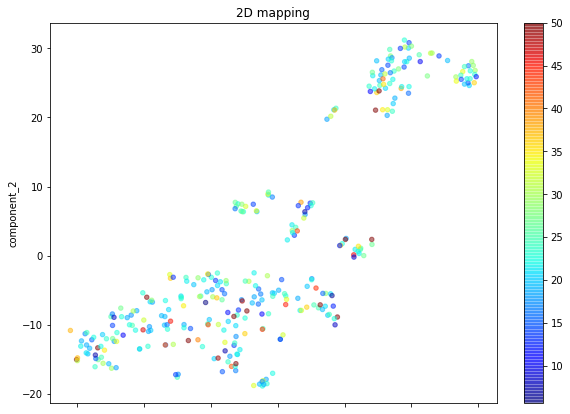

In [89]:
# строим диаграмму рассеяния на полученных данных
display_components_2d(components2d, y_train)
# получается примерно 5 кластеров, но все перемешано

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [90]:
# разбиваем данные на 3 кластера
k_means3 = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_clast_3 = k_means3.fit_predict(X_train_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name = 'clusters_3')

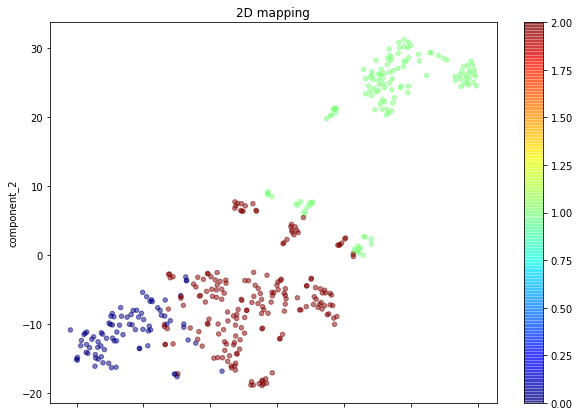

In [91]:
# визуализируем
display_components_2d(components2d, labels_clast_3)

In [92]:
# средние значения CRIM
colnames_centered = feature_names
cluster_centers = pd.DataFrame(k_means3.cluster_centers_, columns=colnames_centered, index=['cluster1', 'cluster2', 'cluster3'])
#k_means3.cluster_centers_
crim_center = pd.DataFrame(cluster_centers['CRIM'])
crim_center
# как найти price не знаю(((

,CRIM
cluster1,-0.398864
cluster2,0.810904
cluster3,-0.359594


**Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [93]:
labels_clast_3_test = k_means3.predict(X_test_scaled)
labels_clast_3_test = pd.Series(labels_clast_3_test, name = 'clusters_3')

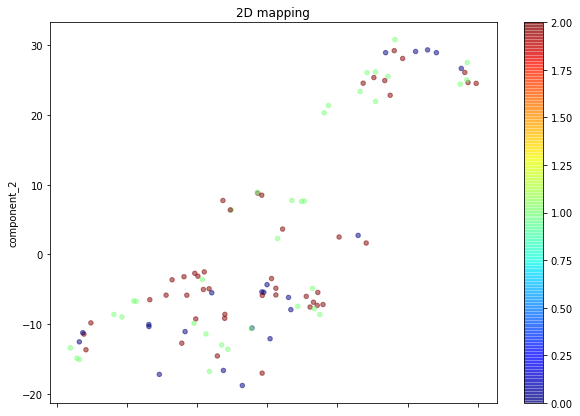

In [94]:
# визуализируем
display_components_2d(components2d, labels_clast_3_test)